In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import citipy 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [6]:
# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d505f23e7b96bc2e3d68fe1051331f1


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | kuytun
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | vagur
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | japura
Processing Record 9 of Set 1 | maceio
Processing Record 10 of Set 1 | faya
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | coahuayana
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | samarai
Processing Record 19 of Set 1 | banfora
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | san juan
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Set 1 | hermanus
Processing Record 24 of Set 1 | vaini
Processing Record 25 of Set 1 | be

Processing Record 44 of Set 4 | acapulco
Processing Record 45 of Set 4 | kouango
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | humaita
Processing Record 48 of Set 4 | grand gaube
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 50 of Set 4 | upernavik
Processing Record 1 of Set 5 | nishihara
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | houston
Processing Record 4 of Set 5 | setermoen
Processing Record 5 of Set 5 | syracuse
Processing Record 6 of Set 5 | qandala
Processing Record 7 of Set 5 | yar-sale
Processing Record 8 of Set 5 | san ignacio
Processing Record 9 of Set 5 | bilma
Processing Record 10 of Set 5 | clyde river
Processing Record 11 of Set 5 | nioro
Processing Record 12 of Set 5 | san isidro
Processing Record 13 of Set 5 | khandbari
Processing Record 14 of Set 5 | vardo
Processing Record 15 of Set 5 | berlevag
Processing Record 16 of Set 5 | alofi
Processing Record 17 of Set 5 | aripuana
Pro

Processing Record 37 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 38 of Set 8 | caconda
Processing Record 39 of Set 8 | kalemie
Processing Record 40 of Set 8 | komsomolskiy
Processing Record 41 of Set 8 | ullapool
Processing Record 42 of Set 8 | dunedin
Processing Record 43 of Set 8 | sept-iles
Processing Record 44 of Set 8 | gat
Processing Record 45 of Set 8 | faanui
Processing Record 46 of Set 8 | hirado
Processing Record 47 of Set 8 | agadez
Processing Record 48 of Set 8 | tecoanapa
Processing Record 49 of Set 8 | casablanca
Processing Record 50 of Set 8 | nanakuli
Processing Record 1 of Set 9 | belle fourche
Processing Record 2 of Set 9 | mont-dore
Processing Record 3 of Set 9 | roald
Processing Record 4 of Set 9 | constantine
Processing Record 5 of Set 9 | hualmay
Processing Record 6 of Set 9 | aljezur
Processing Record 7 of Set 9 | muroto
Processing Record 8 of Set 9 | guerrero negro
Processing Record 9 of Set 9 | vanimo
Processing Record 10 of Set 9 | cat

Processing Record 20 of Set 12 | novosergiyevka
Processing Record 21 of Set 12 | nyrob
Processing Record 22 of Set 12 | teahupoo
Processing Record 23 of Set 12 | joniskelis
Processing Record 24 of Set 12 | dauriya
Processing Record 25 of Set 12 | shubarkuduk
Processing Record 26 of Set 12 | port blair
Processing Record 27 of Set 12 | zabolottya
City not found. Skipping...
Processing Record 28 of Set 12 | rundu
Processing Record 29 of Set 12 | totma
Processing Record 30 of Set 12 | aguimes
Processing Record 31 of Set 12 | kousseri
Processing Record 32 of Set 12 | dakar
Processing Record 33 of Set 12 | turmalina
Processing Record 34 of Set 12 | saint-francois
Processing Record 35 of Set 12 | pontianak
Processing Record 36 of Set 12 | surgut
Processing Record 37 of Set 12 | goure
Processing Record 38 of Set 12 | le mars
Processing Record 39 of Set 12 | bratsk
Processing Record 40 of Set 12 | areosa
Processing Record 41 of Set 12 | afmadu
City not found. Skipping...
Processing Record 42 of

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kuytun,54.3419,101.5036,15.98,95,94,7.27,RU,2021-11-23 17:38:11
1,Mar Del Plata,-38.0023,-57.5575,62.62,77,0,18.01,AR,2021-11-23 17:35:05
2,Iqaluit,63.7506,-68.5145,31.73,93,75,21.00,CA,2021-11-23 17:38:12
3,Butaritari,3.0707,172.7902,81.70,76,52,17.27,KI,2021-11-23 17:35:53
4,Vagur,61.4732,-6.8119,48.61,86,86,33.02,FO,2021-11-23 17:38:12
5,Ushuaia,-54.8000,-68.3000,44.26,61,90,5.75,AR,2021-11-23 17:38:13
6,Ribeira Grande,38.5167,-28.7000,68.40,94,20,13.80,PT,2021-11-23 17:38:13
7,Japura,-0.3167,102.3500,75.22,96,100,0.94,ID,2021-11-23 17:38:14
8,Maceio,-9.6658,-35.7353,90.84,55,40,18.41,BR,2021-11-23 17:38:14
9,Faya,18.3851,42.4509,60.91,42,23,4.81,SA,2021-11-23 17:38:14


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kuytun,RU,2021-11-23 17:38:11,54.3419,101.5036,15.98,95,94,7.27
1,Mar Del Plata,AR,2021-11-23 17:35:05,-38.0023,-57.5575,62.62,77,0,18.01
2,Iqaluit,CA,2021-11-23 17:38:12,63.7506,-68.5145,31.73,93,75,21.00
3,Butaritari,KI,2021-11-23 17:35:53,3.0707,172.7902,81.70,76,52,17.27
4,Vagur,FO,2021-11-23 17:38:12,61.4732,-6.8119,48.61,86,86,33.02
...,...,...,...,...,...,...,...,...,...
542,Le Mars,US,2021-11-23 17:52:31,42.7942,-96.1656,54.90,40,1,19.57
543,Bratsk,RU,2021-11-23 17:52:31,56.1325,101.6142,18.09,91,89,8.41
544,Areosa,PT,2021-11-23 17:52:32,41.7178,-8.8571,56.25,65,4,18.37
545,Buala,SB,2021-11-23 17:52:32,-8.1450,159.5921,80.04,82,71,7.70


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

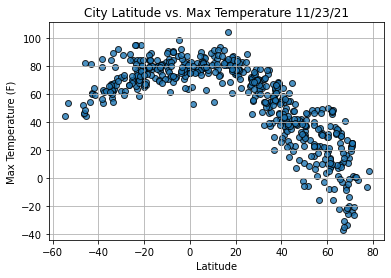

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

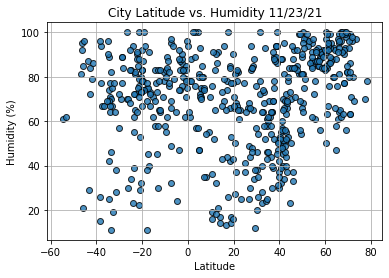

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

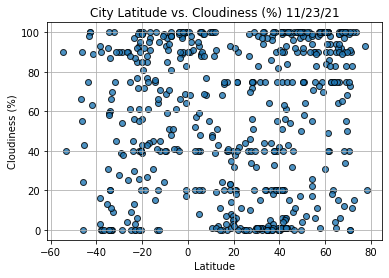

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

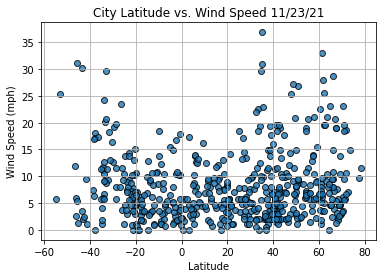

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13


City                       Albany
Country                        US
Date          2021-11-23 17:36:12
Lat                       42.6001
Lng                      -73.9662
Max Temp                    38.03
Humidity                       51
Cloudiness                      6
Wind Speed                    4.0
Name: 13, dtype: object

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

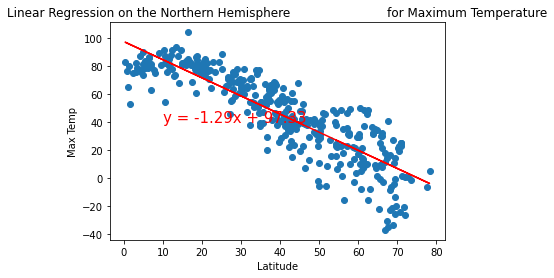

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

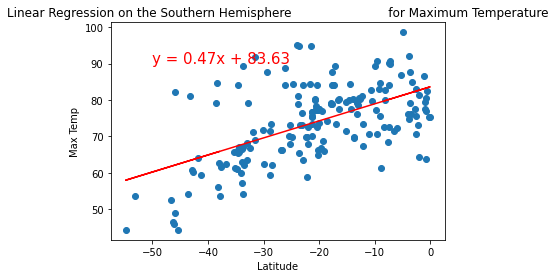

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

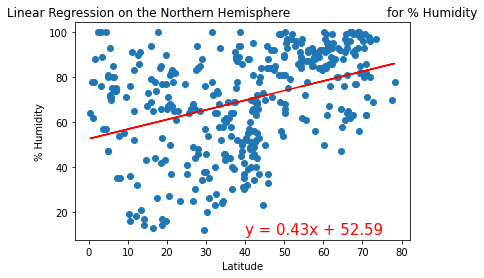

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

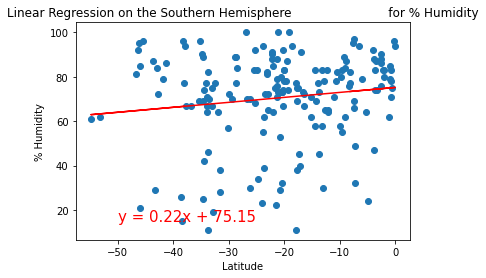

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

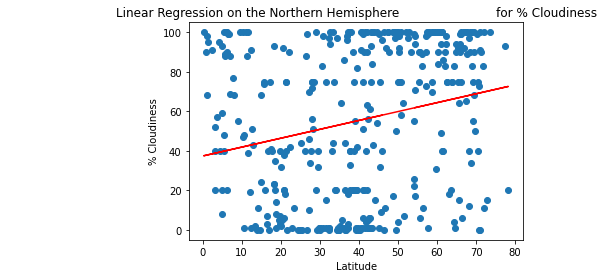

In [27]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

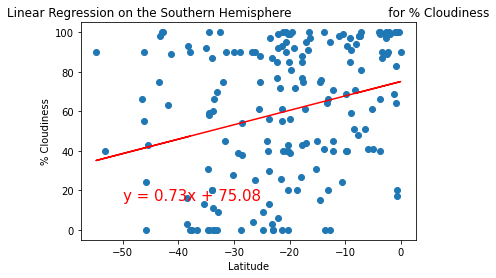

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

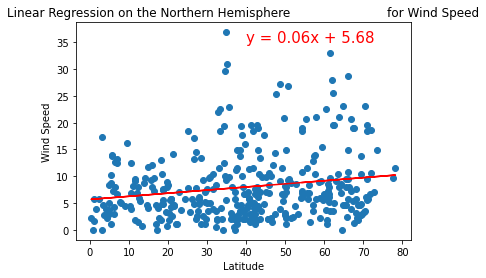

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

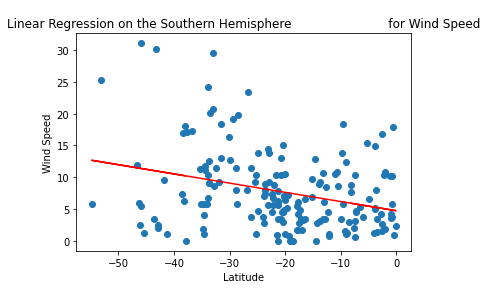

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))